In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

In [2]:
# Load the CIFAR-100 dataset
(x_train, _), (x_test, _) = cifar100.load_data()


169001437/169001437 [==============================] - 6s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [4]:
# Add digital noise to the cifar images (e.g., Gaussian noise)
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(0, 1, x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(0, 1, x_test.shape)


In [5]:
# Clip the pixel values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

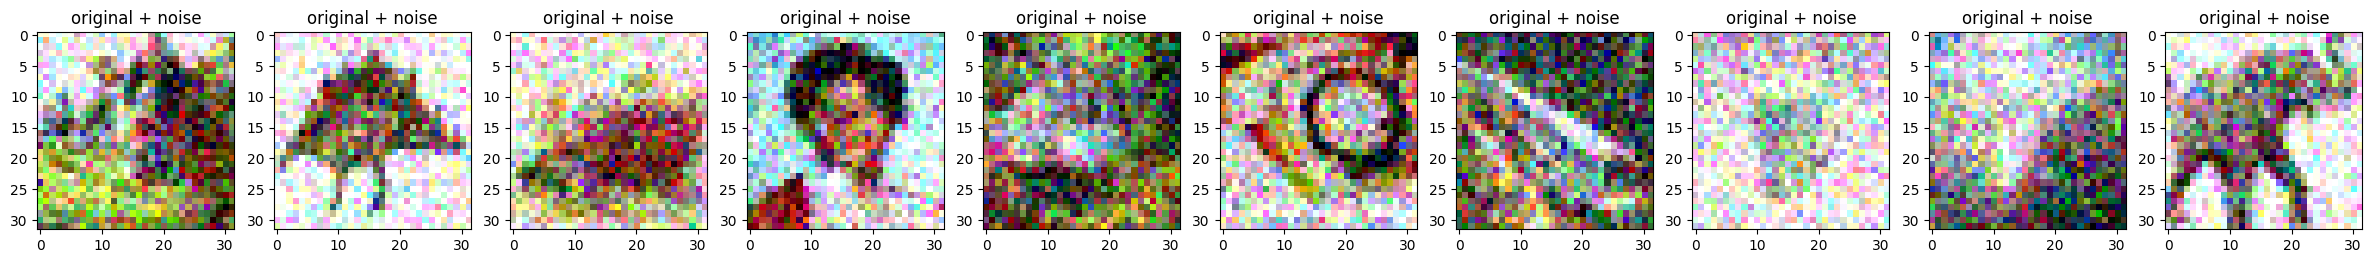

In [6]:
#visulize the noisy images
n = 10
plt.figure(figsize=(30, 3))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_train_noisy[i]))
    plt.gray()
plt.show()

In [7]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model


In [8]:
# Define the input shape
input_img = Input(shape=(32, 32, 3))


In [9]:
# Encoder layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
# Train the autoencoder on noisy images
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
391/391 [==============================] - 24s 28ms/step - loss: 0.5597 - val_loss: 0.5434
Epoch 2/30
391/391 [==============================] - 9s 24ms/step - loss: 0.5424 - val_loss: 0.5398
Epoch 3/30
391/391 [==============================] - 10s 25ms/step - loss: 0.5406 - val_loss: 0.5387
Epoch 4/30
391/391 [==============================] - 10s 24ms/step - loss: 0.5396 - val_loss: 0.5391
Epoch 5/30
391/391 [==============================] - 10s 25ms/step - loss: 0.5389 - val_loss: 0.5376
Epoch 6/30
391/391 [==============================] - 9s 24ms/step - loss: 0.5385 - val_loss: 0.5373
Epoch 7/30
391/391 [==============================] - 9s 24ms/step - loss: 0.5380 - val_loss: 0.5370
Epoch 8/30
391/391 [==============================] - 9s 23ms/step - loss: 0.5376 - val_loss: 0.5366
Epoch 9/30
391/391 [==============================] - 9s 24ms/step - loss: 0.5373 - val_loss: 0.5366
Epoch 10/30
391/391 [==============================] - 9s 24ms/step - loss: 0.5371 - va

In [38]:
# Evaluate the autoencoder on test data
decoded_imgs = autoencoder.predict(x_test_noisy)


313/313 [==============================] - 1s 3ms/step


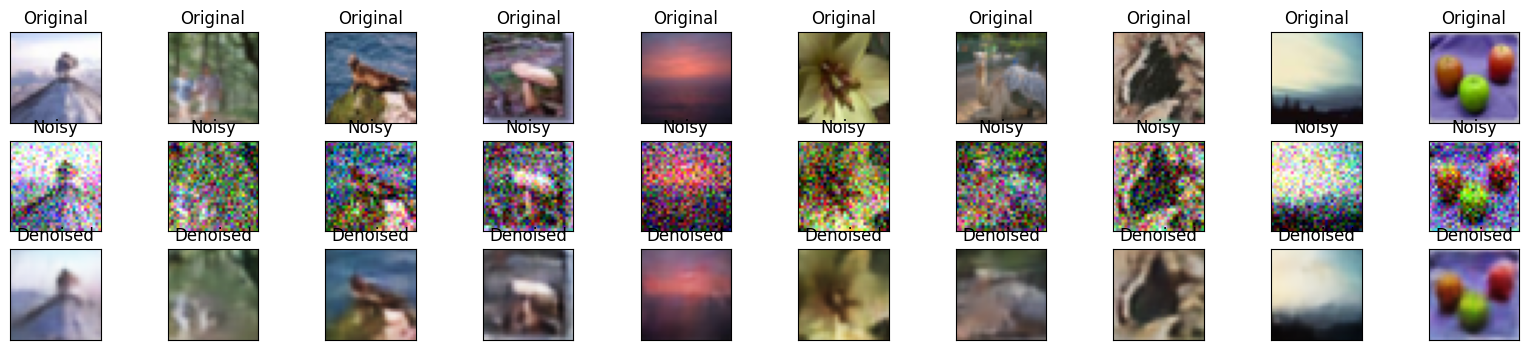

In [12]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [20]:
#import our mnist from tensorflow as our dataset to test our model
from tensorflow.keras.datasets import mnist
(x_train2, _), (x_test2, _) = mnist.load_data()

In [14]:
## Normalize pixel values to be between 0 and 1 on our new dataset
x_train2 = x_train2.astype('float32') / 255.
x_test2 = x_test2.astype('float32') / 255.

In [15]:
# Add digital noise to the Mnist images
noise_factor = 0.2
x_train_noisy2 = x_train2 + noise_factor * np.random.normal(0, 1, x_train2.shape)
x_test_noisy2 = x_test2 + noise_factor * np.random.normal(0, 1, x_test2.shape)



In [28]:
# Clip the pixel values to be between 0 and 1
x_train_noisy2 = np.clip(x_train_noisy2, 0., 1.)
x_test_noisy2 = np.clip(x_test_noisy2, 0., 1.)


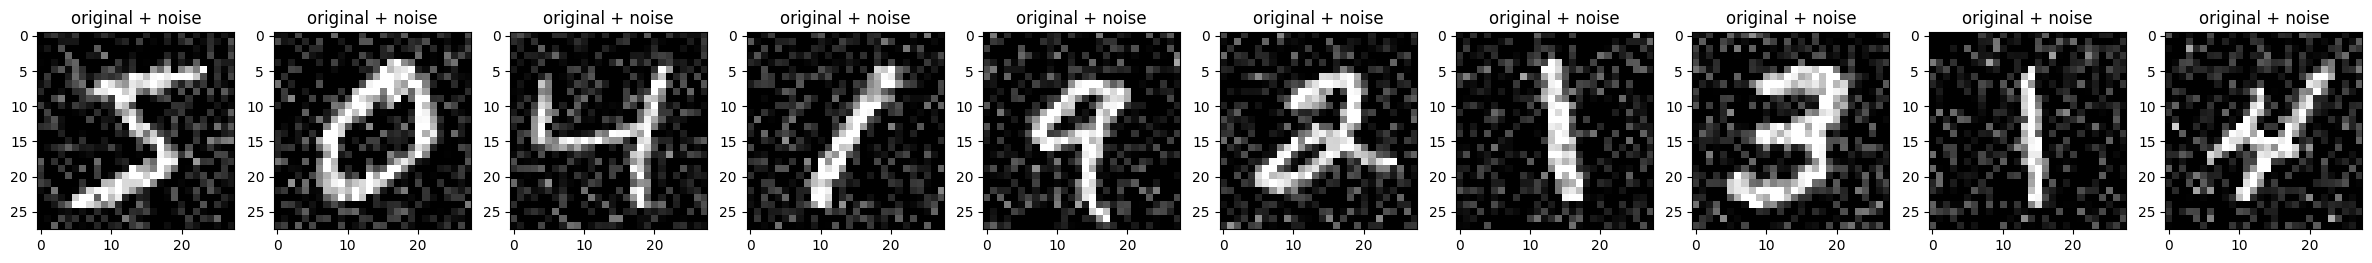

In [29]:
#visulize the noisy mnist images
n = 10
plt.figure(figsize=(30, 3))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_train_noisy2[i]))
    plt.gray()
plt.show()

In [33]:
# Define the mnist input shape
input_img = Input(shape=(28, 28, 1))  # NHWC format





In [40]:
 #Encoder layers #update your model to fit the shape
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [41]:
# Evaluate the autoencoder on test data
decoded_imgs = autoencoder.predict(x_test_noisy2)


313/313 [==============================] - 1s 3ms/step


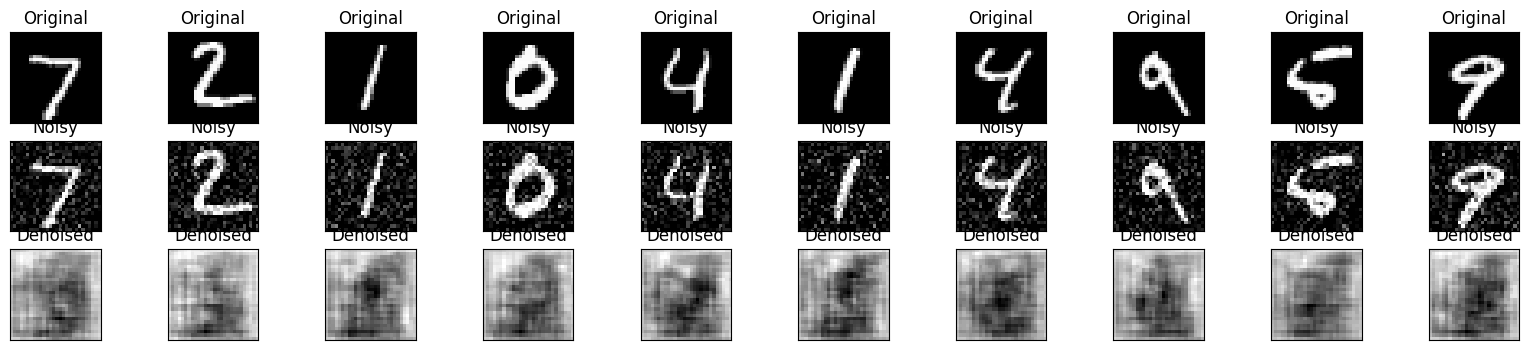

In [42]:


n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original MNIST images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test2[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy MNIST images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy2[i])
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised MNIST images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
